In [3]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("../source") 

In [5]:
import Discrete_Doucet_system as dd
reload(dd)

<module 'Discrete_Doucet_system' from '../source/Discrete_Doucet_system.pyc'>

In [9]:
T0 = 4
Nx_obs = 1000
Nx_dat = 1000
theta_approx0 = np.array([-1.5, 0., 0., 0., 0.])
theta_approx = np.array([  9.78866872e-03, 4.99176141e-01, 2.49789192e+01, 5.98936442e+00, 0.2])
dsystem = dd.Discrete_Doucet_system()
dsystem0 = dd.Discrete_Doucet_system(theta = theta_approx0)
dsystem_approx = dd.Discrete_Doucet_system(theta = theta_approx)
simul  = dd.Simulate(T = T0) 
xobs,pobs = simul.simulate(dsystem, Nx = Nx_obs)
xdat, pdat= simul.simulate(dsystem_approx, Nx = Nx_dat)


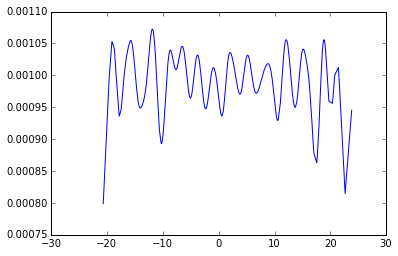

In [10]:
px = dsystem.compare(xdat, xobs) 

xdat_ordered = np.sort(xdat)
px_new_ordered = px[np.argsort(xdat)]

plt.plot(xdat_ordered, px_new_ordered)

In [33]:
Nx_test = 15000
alpha = 0.5
theta_approx = np.array([-1.5, 0, 0, 0.1, 0.2])
for iter in range(0,10):
        print theta_approx
        dsystem_old = Discrete_Doucet_system.Discrete_Doucet_system(theta = theta_approx)
        xdat_test, pdat_test= simul.simulate(dsystem_old, Nx_test,  seed = iter*2)
        px = Nx_test * dsystem.compare(xdat_test, xobs) 
        xdat_new, pdat_new, A_new, B_new = simul.simulate(dsystem_old, Nx_test,  seed = iter*2, Px = px, stat= True)
        xdat_old, pdat_old, A_old, B_old = simul.simulate(dsystem_old, Nx_test,  seed = iter*2+1, stat= True)
        theta_approx = np.array(np.linalg.inv(A_new + alpha*A_old) * np.matrix(B_new + alpha*B_old).transpose())
        theta_approx = np.array(theta_approx.transpose().tolist()[0] + [0.2])
        theta_approx[1] = np.sign(theta_approx[1]) *  np.min([np.abs(theta_approx[1]), 0.99999])

[-1.5  0.   0.   0.1  0.2]
[-2.24752202 -0.24273402  0.8172959   0.83339415  0.2       ]
[-1.68233017 -0.44381991  1.60472916 -0.11985701  0.2       ]
[-1.85254521 -0.78499668  2.69239896 -0.31845421  0.2       ]
[-2.12572145 -0.99999     3.31523938 -0.53144762  0.2       ]
[-2.19871514 -0.99999     3.52835517 -0.76292129  0.2       ]
[-2.25664319 -0.99999     3.78252751 -1.00917803  0.2       ]
[-2.38216752 -0.99999     4.05836824 -1.19916262  0.2       ]
[-2.50858858 -0.99999     4.33649458 -1.38135595  0.2       ]
[-2.65750606 -0.99999     4.70678556 -1.51643469  0.2       ]


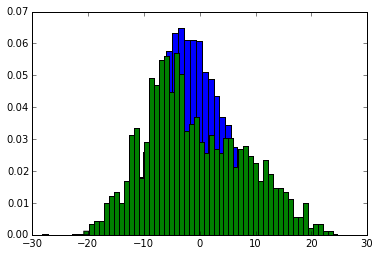

In [38]:
xplot= plt.hist(xdat_test,bins=50, normed=True)
xplot= plt.hist(xobs,bins=50, normed=True)


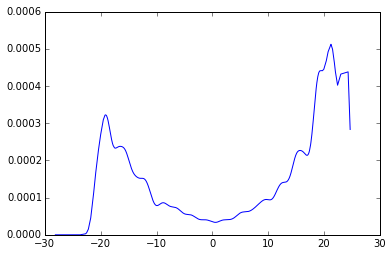

In [37]:
px = dsystem.compare(xdat_test, xobs) 

xdat_ordered = np.sort(xdat_test)
px_new_ordered = px[np.argsort(xdat_test)]

plt.plot(xdat_ordered, px_new_ordered)